# Mini- Projet d'équations aux dérivées partielles

## Résolution de l'équation de Schrödinger dans le cas d'un oscillateur harmonique quantique par la méthode des éléments finis

### I- Choix de la modélisation

<p>L'équation de Schrödinger est l'équation fondamentale de la physique quantique. Il s'agit d'un postulat du physicien Autrichien Erwin Schrödinger. Il s'est servi des travaux de Louis de Broglie sur le photon.En effet, Louis de Broglie donna l'expression de l'énergie d'un photon qui vaut $E=h\nu=\hbar\omega$ avec $h$ la constante de Planck et $\hbar$ la constante de Planck réduite ou constante de Dirac.<p> 
On a la relation suivante: $$\hbar=\frac{h}{2\pi}$$
<h4>Équation de Schrödinger</h4>
Soit $\Psi$ une fonction d'onde. Elle vérifie l'équation suivante:
$$\frac{-\hbar^2}{2m}\Delta\Psi(r,t)+V(r)\Psi(r,t)=i\hbar\frac{\partial\Psi(r,t)}{\partial t}$$
$V$ représente ici le potentiel d'une particule. 
<p>Dans notre étude on va se restreindre à l'étude de l'équation de Schrödinger indépendante du temps:<p>
$$\frac{-\hbar^2}{2m}\Delta\varphi(r)+V(r)\varphi(r)=E\varphi(r)$$
où $E$ est une énergie qui est constante.
La relation entre $\Psi$ et $\varphi$ est la suivante: $$\Psi(r,t)=e^{-i\frac{Et}{\hbar}}\varphi(r)$$
De plus $ \int_{\Omega} \varphi^2 \, \mathrm =1$
<p>On peut réecrire cette équation sous une forme connue vue en cours d'EDP. On obtient ainsi l'expression:<p>
$$-\Delta\varphi(r)+\frac{2m}{\hbar^2}\left(V(r)-E\right)\varphi(r)=0$$

Pour un oscillateur harmonique quantique on a : $V(r)=\frac{1}{2}k\vec{r}^2$

Avec $\omega=\sqrt{\frac{k}{m}}$

En posant $\vec{r}=\sqrt{\frac{\hbar}{m\omega}}\vec{\xi}$ et $\epsilon=\frac{2E}{\hbar\omega}$ une constante, on obtient finalement l'équation suivante:$$\Delta\varphi(\xi)+(\epsilon-\xi^2)\varphi(\xi)=0$$

Les valeurs propres sont obtenues pour les énergies $$E_{n}=En_{x}+En_{y}$$
$$E_{n}=(n_{x}+\frac{1}{2})\hbar\omega + (n_{y}+\frac{1}{2})\hbar\omega$$ avec $n_{x},n_{y}\in\mathbb{N}$. 
D'où $$E_{n}=(n_{x}+n_{y}+1)\hbar\omega$$
Ainsi $\epsilon=n_{x}+n_{y}+1$ 

<h3> II- Formalisation du problème et hypothèses</h3>
<p>Soit $\Omega=]0,1[^2$.<p>
$(D) \left\{
\begin{array}{rl}
  \Delta\varphi(\xi)+(\epsilon-\xi^2)\varphi(\xi)=0 \\
\varphi_{\partial\Omega}=0
\end{array}
\right.$
<p>On cherche l'unique solution $\varphi$ qui satisfait $(D)$.<p>

<h4>Hypothèses:</h4>
<ul>
<li>On suppose que la particule se déplace dans le plan</li>
<li>$\epsilon$ est aléatoire</li>

</ul>

### III- Simulations fenics

<h4>Chargement des modules</h4>

In [2]:
!conda config --add channels conda-forge
!conda install -y -v fenics
from dolfin import *

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbuser/anaconda3_420:

The following NEW packages will be INSTALLED:

    _libgcc_mutex: 0.1-main                        conda-forge
    boost:         1.67.0-py35h3e44d54_0           conda-forge
    boost-cpp:     1.67.0-h3a22d5f_0               conda-forge
    cloog:         0.18.0-0                                   
    cmake:         3.9.4-h142f0e9_0                           
    eigen:         3.3.7-h2d50403_0                conda-forge
    fenics:        2018.1.0-py35hba71e3e_1         conda-forge
    gcc:           4.8.5-7                                    
    gmp:           6.1.2-hfc679d8_0                conda-forge
    hypre:         2.14.0-h7df9f4f_1               conda-forge
    isl:           0.12.2-0                                   
    libopenblas:   0.2.20-h9ac9557_7                          
    libuv:         1.24.1-h470a237_0            

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/depends_on.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/external.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/extractor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/features.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/parameters/accumulator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/parameters/sample.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/parameters/weight.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/framework/parameters/weights.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/statistics/weighted_tail_quantile.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/statistics/weighted_tail_variate_means.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/statistics/weighted_variance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/statistics/with_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/accumulators/statistics_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/algorithm.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/clamp.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/cxx11/all_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/cxx11/any_of.hpp'

file exists, but clob

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/split.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/std/list_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/std/rope_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/std/slist_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/std/string_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/std_containers_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/trim.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/trim_all.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/algorithm/string/yes_no_type.hpp'

file exists, but clobbering: '/ho

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/abi_prefix.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/abi_suffix.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/archive_serializer_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/auto_link_archive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/auto_link_warchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/basic_iarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/basic_iserializer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/basic_oarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/detail/basic_oserializer.hpp'

file exists, but clobber

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/text_iarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/text_oarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/text_wiarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/text_woarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/tmpdir.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/wcslen.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/xml_archive_exception.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/xml_iarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/xml_oarchive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/archive/xml_wiarchive.hpp'

file exists, but

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/dev_poll_reactor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/dev_poll_reactor.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/epoll_reactor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/epoll_reactor.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/eventfd_select_interrupter.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/handler_tracking.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/kqueue_reactor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/kqueue_reactor.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/impl/pipe_select_interrupter.

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_accept_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_connect_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_recv_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_recvfrom_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_recvmsg_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_send_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_sendto_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/reactive_socket_service.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/win_static_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/win_thread.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/win_tss_ptr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/winrt_async_manager.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/winrt_async_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/winrt_resolve_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/winrt_resolver_service.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/winrt_socket_connect_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/detail/winrt_socket_recv_op.hpp'

file exists, but clobbering: '/home/nbu

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/posix/basic_stream_descriptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/posix/descriptor_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/posix/stream_descriptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/posix/stream_descriptor_service.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/raw_socket_service.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/read.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/read_at.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/read_until.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/seq_packet_socket_service.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/asio/serial_po

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/assign/std/set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/assign/std/slist.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/assign/std/stack.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/assign/std/vector.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/atomic.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/atomic/atomic.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/atomic/atomic_flag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/atomic/capabilities.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/atomic/detail/atomic_flag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/atomic/detail/atomic_template.hpp'

file exists, but clobbering: '/home/nbuser/anac

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/container_adaptor/unordered_set_adaptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/container_adaptor/vector_adaptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/container_adaptor/vector_map_adaptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/detail/bimap_core.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/detail/concept_tags.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/detail/debug/static_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/detail/generate_index_binder.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/detail/generate_relation_binder.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bimap/detail/generate_view_bin

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/apply.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/arg.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/bind.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/bind_cc.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/bind_mf2_cc.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/bind_mf_cc.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/bind_template.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/make_adaptable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/mem_fn.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/mem_fn_cc.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/bind/mem_fn_templ

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/csignal'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cstdarg'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cstddef'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cstdio'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cstdlib'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cstring'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/ctime'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cwchar'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compatibility/cpp_c_headers/cwctype'

file exists, but clobbe

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/inclusive_scan.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/inner_product.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/inplace_merge.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/iota.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/is_partitioned.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/is_permutation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/is_sorted.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/lexicographical_compare.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/algorithm/lower_bound.hpp'

file exists, but clob

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/assert_cl_success.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/buffer_value.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/device_ptr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/diagnostic.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/duration.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/get_object_info.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/getenv.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/global_static.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/detail/is_buffer_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_4

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/opengl/cl_gl_ext.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/opengl/context.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/opengl/gl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/opengl/opengl_buffer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/opengl/opengl_renderbuffer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/opengl/opengl_texture.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/qt.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/qt/qimage.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/interop/qt/qpoint.hpp'

file exists, but clobbering:

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/types/struct.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/types/tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/user_event.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility/dim.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility/extents.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility/invoke.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility/program_cache.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility/source.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/compute/utility/wait_list.hpp'

file exi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/macos.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/qnxnto.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/solaris.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/symbian.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/vms.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/vxworks.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/win32.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/platform/zos.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/requires_threads.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/config/stdlib/dinkumware.hpp'

fi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/new_allocator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/node_allocator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/node_handle.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/options.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/pmr/deque.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/pmr/flat_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/pmr/flat_set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/container/pmr/global_resource.hpp'

file exists, but

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/convert/stream.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/convert/strtol.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/addressof.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/checked_delete.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/demangle.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/enable_if.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/explicit_operator_bool.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/ignore_unused.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/is_same.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/core/lightweight_test.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_4

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/cregex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/cstdfloat.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/cstdint.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/cstdlib.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/current_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/cxx11_char_types.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/adjust_functors.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/c_local_time_adjustor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/c_time.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_ti

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/posix_time_legacy_io.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/posix_time_system.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/posix_time_types.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/ptime.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/time_formatters.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/time_formatters_limited.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/time_parsers.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_time/time_period.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/date_time/posix_ti

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/dll.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/environment.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/error_codes.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/error_handling.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/event.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/file_management.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/file_mapping.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/get_current_process.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/detail/winapi/get_current_process_id.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/inc

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/buffers.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/conversion.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/detail/config.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/detail/cover_operators.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/detail/disable_warnings.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/detail/disable_warnings_pop.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/detail/intrinsic.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/detail/lightweight_test.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/endian.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/endian/std_pair.h

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/numa/pin_thread.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/numa/topology.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/operations.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/policy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/pooled_fixedsize_stack.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/properties.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/protected_fixedsize_stack.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/recursive_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fiber/recursive_timed_mutex.hpp'

file exists, but c

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/format/format_implementation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/format/free_funcs.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/format/group.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/format/internals.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/format/internals_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/format/parsing.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function/detail/function_iterate.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function/detail/maybe_include.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function/detail/prologue.hpp'

file exists, but clo

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity10_0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity10_1.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity20_0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity20_1.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity30_0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity30_1.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity40_0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/function_types/detail/synthesize_impl/arity40_1.hpp'



file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_array/tag_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple/boost_tuple_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple/detail/at_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple/detail/begin_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple/detail/build_cons.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple/detail/category_of_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/boost_tuple/detail/convert_impl.hpp'

file exists, but clobbering: '/home/nbuser/an

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/define_struct_inline.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/deref_data_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/deref_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/end_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/extension.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/is_sequence_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/is_view_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/adapted/struct/detail/key_of_impl.hpp'

file exists, but clobbering: '/home/nbuser/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/filter_if.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/flatten.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/insert.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/insert_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/join.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/pop_back.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/pop_front.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/algorithm/transformation/push_back.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/deque/detail/deque_keyed_values.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/deque/detail/end_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/deque/detail/is_sequence_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/deque/detail/keyed_element.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/deque/detail/value_at_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/deque/front_extended_deque.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/cons_tie.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/map_tie40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/map_tie50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/vector_tie.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/vector_tie10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/vector_tie20.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/vector_tie30.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/generation/detail/preprocessed/vector_tie40.hpp'

file exists, but clobbering: '/home/nbuser

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/at_key_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/begin_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/build_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/cpp03/as_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/cpp03/at_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/cpp03/begin_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/cpp03/convert.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/map/detail/cpp03/convert_impl.hpp'

file exists, but clobbering: '/home/nbuser/anacond

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/cpp03/preprocessed/set50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/cpp03/preprocessed/set50_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/cpp03/preprocessed/set_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/cpp03/set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/cpp03/set_forward_ctor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/cpp03/set_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/deref_data_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/set/detail/deref_impl.hpp'

file 

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector30.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector30_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector40_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector50_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector_forward_ctor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/container/vector/detail/cpp03/vector_f

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/boost_array.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/boost_tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/category_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/clear.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/comparison.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/cons.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/cons_tie.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/container.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/convert.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/c

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/make_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/make_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/make_set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/make_tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/make_unfused.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/make_vector.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/map_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/map_tie.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/include/mo

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/deref_data.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/adapt_deref_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/adapt_value_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/advance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/distance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/segment_sequence.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/segmented_equal_to.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator/detail/segmented_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/iterator

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/intrinsic/value_at_key.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/intrinsic_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/io.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/io/detail/in.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/io/detail/manip.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/io/detail/out.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/io/in.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/io/out.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/sequence/sequence_facade.hpp'

file exists, but clobbering: '/home/nbuser/anaconda

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/begin_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/deref_data_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/deref_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/end_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/equal_to_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/key_of_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/filter_view/detail/next_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/inc

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/end_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/key_of_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/next_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/prior_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/value_at_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/value_of_data_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/detail/value_of_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/fusion/view/reverse_view/reverse_view.hpp'

file exists, but clobbering: '/ho

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/assign_values.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/azimuth.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/buffer/buffer_inserter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/buffer/buffer_policies.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/buffer/buffered_piece_collection.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/buffer/buffered_ring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/buffer/get_piece_turns.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/buffer/line_line_intersection

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/envelope/transform_units.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/equals/collect_vectors.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/equals/implementation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/equals/interface.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/equals/point_point.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/expand/box.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/expand/implementation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/expand/indexed.hpp'

file exists, b

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/cluster_info.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/convert_ring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/copy_segment_point.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/copy_segments.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/debug_turn_info.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/do_reverse.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overlay/enrich_intersection_points.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/overl

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/relation/interface.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/ring_identifier.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/sections/range_by_section.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/sections/section_box_policies.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/sections/section_functions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/sections/sectionalize.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/signed_size_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/algorithms/detail/single_geometry.h

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/coordinate_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/cs.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/exception.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/exterior_ring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/geometry_id.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/interior_rings.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/interior_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/is_areal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/core/mutable_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geo

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/multi_polygon.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/point.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/point_xy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/pointing_segment.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/polygon.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/register/box.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/register/linestring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/register/multi_linestring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/geometries/register/multi_point

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/rstar/rstar.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/are_boxes_ok.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/are_counts_ok.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/are_levels_ok.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/gl_draw.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/print.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/statistics.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/index/detail/rtree/utilities/view.hpp'

file ex

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/multi_sum.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/overlay/copy_segment_point.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/overlay/copy_segments.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/overlay/get_ring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/overlay/get_turns.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/overlay/self_turn_points.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithms/detail/point_on_border.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/multi/algorithm

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/policies/robustness/segment_ratio_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/buffer_distance_asymmetric.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/buffer_distance_symmetric.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/hull_graham_andrew.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/point_in_box_by_side.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/point_in_point.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/point_in_poly_oriented_winding.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/agnostic/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/intersection.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/intersection_elliptic.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/mapping_ssf.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/parameters.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/side.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/side_andoyer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/side_thomas.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/geometry/strategies/geographic/side_vincenty.hpp'

file exists, but clobbering: '/hom

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/bit_aligned_pixel_reference.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/channel.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/channel_algorithm.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/cmyk.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/color_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/color_base_algorithm.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/color_convert.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/deprecated.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/device_n.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/gil/extension/dynamic_image/algorithm.hpp'

file exists, but clobbering: '/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/depth_first_search.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/adj_list_edge_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/adjacency_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/array_binary_tree.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/augment.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/compressed_sparse_row_struct.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/connected_components.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/d_ary_heap.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/detail/edge.hpp'

file exists, but clobbering: '/home/nbuser/anaco

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/edge_coloring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/edge_connectivity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/edge_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/edmonds_karp_max_flow.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/edmunds_karp_max_flow.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/erdos_renyi_generator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/exception.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/exterior_property.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/filtered_graph.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/find_flow_cost.hpp'

file

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/properties.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/property_iter_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/property_maps/constant_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/property_maps/container_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/property_maps/matrix_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/property_maps/null_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/push_relabel_max_flow.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/r_c_shortest_paths.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/graph/random.hpp'

file exists, but clobbering: '/home

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/concept/product.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/concept/ring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/concept/searchable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/concept/sequence.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/concept/struct.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/config.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/contains.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/core.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/core/common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/core/default.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_4

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/experimental/view.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/fusion.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/fusion/deque.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/fusion/detail/common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/fusion/list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/fusion/tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/fusion/vector.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/boost/mpl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ext/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/iterable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/logical.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/metafunction.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/monad.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/monad_plus.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/monoid.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/orderable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/product.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/concept/ring.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/f

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/not.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/not_equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/one.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/optional.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/or.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/ordering.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/pair.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/partition.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/permutations.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/fwd/plus.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boo

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/negate.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/none.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/none_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/not.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/not_equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/one.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/optional.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/or.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/ordering.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/pair.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/hana/partition.hpp'

file exists, but clobber

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/concept/interval_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/concept/interval_set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/concept/interval_set_value.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/concept/joinable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/concept/map_value.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/concept/set_value.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/continuous_interval.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/detail/associated_value.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/detail/boost_config.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/detail/con

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_interval_container.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_interval_joiner.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_interval_separator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_interval_splitter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_key_container_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_numeric.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/icl/type_traits/is_total.hpp'

file exists, but clobberi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/min_max.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/move.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/mpl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/named_proxy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/nothrow.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/os_file_functions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/os_thread_functions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/pointer_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/detail/portable_intermodule_singleton.hpp'

file exi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/interprocess_sharable_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/interprocess_upgradable_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/lock_options.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/mutex_family.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/named_condition.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/named_condition_any.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/named_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sync/named_recursive_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/interprocess/sy

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/default_header_holder.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/ebo_functor_holder.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/empty_node_checker.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/equal_to_value.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/exception_disposer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/function_detector.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/generic_hook.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/get_value_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/intrusive/detail/has_member_functio

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/code_converter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/combine.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/compose.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/concepts.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/constants.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/copy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/detail/absolute_path.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/detail/access_control.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/detail/adapter/concept_adapter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/detail/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/device/back_inserter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/device/file.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/device/file_descriptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/device/mapped_file.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/device/null.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/filter/aggregate.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/filter/bzip2.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/filter/counter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/iostreams/filter/grep.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/io

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/bind_functions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/control_constructs_common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/function_adaptors.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/is_instance_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/lambda_config.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/lambda_functor_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/lambda_functors.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/lambda_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/lambda/detail/lambda_traits.hpp'

file exists, but clobbering: '/h

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/const_bind.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/default.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/facility/add.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/facility/is.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/facility/remove.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/inline.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_function/detail/preprocessor/keyword/recursive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/local_functi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/attributes/value_extraction_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/attributes/value_visitation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/attributes/value_visitation_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/core.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/core/core.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/core/record.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/core/record_view.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/detail/adaptive_mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/detail/asio_fwd.hpp'

file exis

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/is_keyword_descriptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/keyword.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/keyword_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/message.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/predicates.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/predicates/begins_with.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/predicates/channel_severity_filter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/predicates/contains.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/expressions/predicates/ends_with.hpp'

fil

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/global_logger_storage.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/logger.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/record_ostream.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/severity_channel_logger.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/severity_feature.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/severity_logger.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/sources/threading_models.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/support/date_time.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/log/support/exception.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/incl

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/common_factor_ct.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/common_factor_rt.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/acos.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/acosh.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/asin.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/asinh.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/atan.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/atanh.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/complex/details.hpp'

file exists, but clobbering: '/home/nbuse

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/quadrature/trapezoidal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/quaternion.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/acosh.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/airy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/asinh.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/atanh.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/bernoulli.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/bessel.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/inclu

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/lanczos.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/legendre.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/legendre_stieltjes.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/log1p.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/math_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/modf.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/next.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/nonfinite_num_facets.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/special_functions/owens_t.hpp'

file exist

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_18.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_19.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_2.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_20.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_3.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_4.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_5.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/detail/polynomial_horner3_6.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boos

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/precision.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/promotion.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/rational.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/real_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/roots.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/series.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/stats.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/toms748_solve.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/math/tools/tuple.hpp'

file exists, but clobbering: '/home

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/next_line.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/nth_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/nth_of_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/one_char.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/one_char_except.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/one_char_except_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/one_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/one_of_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/optional.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/range.hpp'

file exists, but clobbering: '

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/entire_input.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/digit_expected.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/end_of_input_expected.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/expected_to_fail.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/index_out_of_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/letter_expected.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/literal_expected.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/error/none_of_the_expected_cases_found.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/er

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/keyword.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/last_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/letter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/lit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/lit_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/look_ahead.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/middle_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/next_char.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/next_line.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/metaparse/v1/nth_of.hpp'

file exists, but cl

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/detail/std_ns_end.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/detail/to_raw_pointer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/detail/type_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/detail/unique_ptr_meta_utils.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/detail/workaround.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/make_unique.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/move.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/move/unique_ptr.hpp'

file exists, but clobbering: '

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/as_sequence.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/assert.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/at.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/at_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/O1_size_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/adl_barrier.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/advance_backward.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/advance_forward.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/apply_1st.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/arg_typedef.hpp'

file exists, but clobbering: '/home/nbuser/anaconda

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/lambda_spec.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/lambda_support.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/largest_int.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/logical_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/msvc_dtw.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/msvc_eti_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/msvc_is_class.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/msvc_never_true.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/msvc_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/na.hpp'

file exists, but clobber

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/basic_bind.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/bind.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/bind_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/bitand.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/bitor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/bitxor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/deque.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc551/divides.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/or.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/placeholders.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/plus.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/quote.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/reverse_fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/reverse_iter_fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/bcc_pre590/set_c.hpp'

file exists, but clobbering: '/home/nbuser

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/bitand.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/bitor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/bitxor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/deque.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/divides.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/equal_to.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/full_lambda.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/gcc/greater.hpp'



file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/reverse_fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/reverse_iter_fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/set_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/shift_left.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/shift_right.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/template_arity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/msvc60/times.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/divides.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/equal_to.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/full_lambda.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/greater.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/greater_equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/inherit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/mwcw/iter_fold_if_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/p

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/shift_left.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/shift_right.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/template_arity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/times.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/unpack_args.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/vector.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ctps/vector_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/no_ttp/advance_backward.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/greater_equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/inherit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/iter_fold_if_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/iter_fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/lambda_no_ctps.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/less.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/less_equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/aux_/preprocessed/plain/list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boos

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/begin.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/begin_end.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/begin_end_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bind.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bind_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bitand.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bitor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bitwise.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bitxor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bool.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/bool_fwd.hpp'

file exists, but clobbe

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/begin_end.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/clear.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/empty.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/front.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/include_preprocessed.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/item.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/numbered.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/numbered_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/list/aux_/pop_front.hpp

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/map/map40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/map/map50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/math/fixed_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/math/is_even.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/math/rational_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/max.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/max_element.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/min.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/min_element.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/min_max.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/minus.hpp'

f

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/aux_/value_type_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set0_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set10_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set20.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set20_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set30.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set30_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/set/set40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boos

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/aux_/preprocessed/typeof_based/vector50_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/aux_/push_back.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/aux_/push_front.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/aux_/size.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/aux_/tag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/aux_/vector0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/vector0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/vector0_c.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/vector/vector10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/mpl/v

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/copy_array.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/extent_gen.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/extent_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/index_gen.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/index_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/multi_array_ref.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/range_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/storage_order.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_array/subarray.

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index/ranked_index.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index/ranked_index_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index/safe_mode_errors.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index/sequenced_index.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index/sequenced_index_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index/tag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index_container.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multi_index_container_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/multiprecision/concepts/mp_number_archetypes.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_42

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/meta.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/numeric_cast_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/old_numeric_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/preprocessed/numeric_cast_traits_common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/preprocessed/numeric_cast_traits_long_long.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/sign_mixture.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/detail/udt_builtin_mixture.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/conversion/int_float_mixture.hpp'

file ex

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/compute/compute_algebra.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/compute/compute_algebra_dispatcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/compute/compute_operations.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/compute/compute_operations_dispatcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/compute/compute_resize.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/eigen/eigen.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/eigen/eigen_algebra.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/external/eigen/eigen_algebra

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/detail/integrate_const.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/detail/integrate_n_steps.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/detail/integrate_times.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/integrate.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/integrate_adaptive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/integrate_const.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/iterator/integrate/integrate_n_steps.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/ite

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/copy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/detail/is_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/detail/less_with_sign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/is_pair.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/is_resizeable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/multi_array_adaption.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/n_ary_helper.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/odeint_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/numeric/odeint/util/resize.hpp'

file exi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/optional/detail/optional_reference_spec.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/optional/detail/optional_relops.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/optional/detail/optional_swap.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/optional/optional.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/optional/optional_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/optional/optional_io.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/parameter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/parameter/aux_/arg_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/parameter/aux_/cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/parameter/aux_/defa

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_function_object_40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_function_object_50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_member_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_member_function_10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_member_function_20.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_member_function_30.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/bind/detail/cpp03/preprocessed/bind_member_function_40.hpp'

file exists, but clobbe

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/call_50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/expression.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/expression_10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/expression_20.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/expression_30.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/expression_40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/preprocessed/expression_50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/core/detail/cpp03/pr

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/const_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/construct.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/delete.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/detail/cpp03/construct.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/detail/cpp03/construct_eval.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/detail/cpp03/construct_expr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/detail/cpp03/new.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/object/detail/cpp03/new_eval.hpp'

file exists, but clobberin

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_expr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_expr_10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_expr_20.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_expr_30.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_expr_40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_expr_50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/operator/detail/cpp03/preprocessed/mem_fun_ptr_gen.hpp'

file exists, but clobbering

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/detail/preprocessed/try_catch_expression_40.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/detail/preprocessed/try_catch_expression_50.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/detail/switch.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/detail/try_catch_eval.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/detail/try_catch_expression.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/do_while.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/for.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/phoenix/statement/if.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/p

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/is_invocable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/is_nothrow_eq_comparable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/iterator_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/iterator_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/newdelete_allocator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/packed_segment.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/poly_collection.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/poly_collection/detail/segment.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/po

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/polygon/voronoi_diagram.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/polygon/voronoi_geometry_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/polymorphic_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/polymorphic_pointer_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pool/detail/guard.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pool/detail/mutex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pool/detail/pool_construct.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pool/detail/pool_construct_simple.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pool/object_pool.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pool/pool.hpp'

file exist

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/language/objc.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/language/stdc.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/language/stdcpp.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library/c.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library/c/_prefix.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library/c/gnu.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library/c/uc.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library/c/vms.h'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/predef/library/c/zos.h'

file exists, but clobbering: '/home/nbuser/an

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/array/to_tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/assert_msg.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/cat.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/comma.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/comma_if.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/comparison.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/comparison/equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/comparison/greater.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/comparison/greater_equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/pr

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/forward3.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/forward4.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/forward5.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/reverse1.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/reverse2.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/reverse3.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/reverse4.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/iteration/detail/iter/reverse5.hpp'

file exists, but clobbering: '/h

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_params.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_params_with_a_default.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_params_with_defaults.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_shifted.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_shifted_binary_params.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_shifted_params.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_trailing.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/repetition/enum_trailing_binary_params.hpp'

file exists, but clobberi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/variadic/elem.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/variadic/size.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/variadic/to_array.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/variadic/to_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/variadic/to_seq.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/variadic/to_tuple.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/while.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/preprocessor/wstringize.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/ar

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/cmd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/compare_handles.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/env_init.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/environment.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/executor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/file_descriptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/file_in.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/file_out.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/process/detail/windows/group_handle.hpp'

file

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_map/property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_map/property_map_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_map/shared_array_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_map/transform_value_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_map/vector_property_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_tree/detail/exception_implementation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_tree/detail/file_parser_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_tree/detail/info_parser_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/property_tree/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/make_expr_funop.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/matches_.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/memfun_funop.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/or_n.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/poly_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/poly_function_funop.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/poly_function_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/preprocessed/and_n.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/detail/preprocessed/args.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_42

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/default_function_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/expand_pack.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/fold_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/lazy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/make.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/make_gcc_workaround.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/pack.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/pack_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/proto/transform/detail/pass_through_impl

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/assert.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/deduce_mat.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/deduce_quat.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/deduce_scalar.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/deduce_vec.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/detail/cofactor_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/detail/determinant_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/detail/mat_assign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/detail/quat_assign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/qvm/detail/remove_const.hpp'

file exists, but clobbering: '/ho

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/disable_warnings.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/enable_warnings.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/generator_bits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/generator_seed_seq.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/int_float_pair.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/integer_log2.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/iterator_mixin.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/large_arithmetic.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/random/detail/operators.hpp'

file exists, but clobbering: '/home/nbuser/a

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/adjacent_find.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/binary_search.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/copy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/copy_backward.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/count.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/count_if.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/equal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algorithm/equal_range.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/algori

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/as_literal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/begin.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/collection_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/collection_traits_detail.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/combine_cxx03.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/combine_cxx11.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/combine_no_rvalue.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/combine_rvalue.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/range/detail/common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/inclu

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/not_equal_to.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/numeric_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/plus.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/rational_c_tag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/rational_constant.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/sign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/mpl/times.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/ratio.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/ratio_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/ratio/ratio_io.hpp'

file exists, but clobbering: '/home/nbuser

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/boost_unordered_set.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/collection_size_type.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/collection_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/collections_load_imp.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/collections_save_imp.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/complex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/config.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/deque.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/serialization/detail/is_default_constructible.hpp'

file exists, but clobbering

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/detail/signal_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/detail/signals_common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/detail/slot_call_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal0.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal1.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal2.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal3.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal4.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/signals/signal5.hpp'

file exists, but clobberin

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/lwm_win32_cs.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/operator_bool.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/quick_allocator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/shared_count.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/sp_convertible.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/sp_counted_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/sp_counted_base_acc_ia64.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/sp_counted_base_aix.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/smart_ptr/detail/sp_counted_base_clang.hpp'



file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/insert_at_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/insert_key_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/push_back_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/push_front_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/ref_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/ref_const_ref_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/ref_const_ref_const_ref_a.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/actor/ref_const_ref_value_actor.hpp'

file exists, but clobbering:

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/primitives/numerics.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/primitives/numerics_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/primitives/primitives.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/safe_bool.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/scanner/impl/skipper.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/scanner/scanner.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/scanner/scanner_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/core/scanner/skipper.hpp'

file exists, but clobbering: '/home

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/symbols/impl/tst.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/symbols/symbols.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/symbols/symbols_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/symbols/typeof.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/tree/ast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/tree/ast_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/tree/common.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/tree/common_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/classic/tree/impl/parse

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/fail_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/generate.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/generate_auto.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/generate_to.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/get_casetag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/get_stricttag.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/indirect_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/detail/output_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spir

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/stream/format_manip_attr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/stream/ostream_iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/stream/stream.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/string.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/string/lit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/string/symbols.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/karma/what.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/lex.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/lex/argument.hpp'

file exists, but clobbering: '/home/nbu

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/enable_lit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/expect_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/expectation_failure.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/fail_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/parse.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/parse_auto.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/pass_container.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/pass_function.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/detail/permute_

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/stream/stream.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/string.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/string/detail/tst.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/string/lit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/string/symbols.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/string/tst.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/string/tst_map.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/qi/what.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/parser/tree/selection_node.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/parser/tree/sequence_node.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/partition/charset.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/partition/equivset.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/rules.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/runtime_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/serialise.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/support/detail/lexer/size_t

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/auxiliary/any_parser.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/auxiliary/attr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/auxiliary/eoi.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/auxiliary/eol.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/auxiliary/eps.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/auxiliary/guard.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/binary.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/binary/binary.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/char.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/no_case.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/numeric_utils/detail/extract_int.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/numeric_utils/extract_int.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/numeric_utils/extract_real.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/numeric_utils/pow10.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/numeric_utils/sign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/subcontext.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/home/x3/support/traits/attribute_category.hpp'

file exists, but clobbering: '

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_epsilon.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_erase_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_error_handling.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_escape_char.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_escape_char_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_exceptions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_exceptions_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_exclusive_or.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_file

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_skipper_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_spirit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_static.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_stored_rule.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_stored_rule_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_subrule.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_subrule_fwd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_swap_actor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/classic_switch.hpp'

file exi

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_lexer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_lexertl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_lexertl_position_token.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_lexertl_token.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_plain_token.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_primitives.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_static_lexertl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_tokenize_and_parse.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/lex_tokenize_and_parse_attr.hpp'

file

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_operator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_optional.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_parse.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_parse_attr.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_parse_auto.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_permutation.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_plus.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_raw.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/include/qi_real.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/sp

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/karma.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/karma_confix.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/karma_directive.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/karma_nonterminal.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/karma_subrule.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/qi.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/qi_advance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/repository/include/qi_confix.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/spirit/reposit

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/system/detail/local_free_on_destruction.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/system/error_code.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/system/linux_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/system/system_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/system/windows_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/auto_unit_test.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/data/config.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/data/dataset.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/data/for_each_sample.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/data/generators.hpp'

file exist

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/test_case_template.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/test_exec_monitor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/test_framework_init_observer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/test_tools.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/tools/assertion.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/tools/assertion_result.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/tools/collection_comparison_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/tools/context.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/test/tools/cstring_comparison_op.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/te

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/deque_views.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/detail/sync_deque_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/detail/sync_queue_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/queue_adaptor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/queue_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/queue_op_status.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/queue_views.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/concurrent_queues/sync_bounded_queue.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_4

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/experimental/parallel/v2/task_region.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/experimental/task_region.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/externally_locked.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/externally_locked_stream.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/future.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/futures/future_error.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/futures/future_error_code.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/futures/future_status.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/thread/futures/is_future_type.hpp'

file exists, but clobbering: '/home/nbus

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tokenizer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dcomp_mem_fun.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/ddata.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/ddeftype.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dftclass.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dfunction.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dlambda.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dmem_data.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dmem_fun.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/tti/detail/dmem_type.hpp'

file exists, but clobbering: '/home/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/dynamic_any_cast.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/dynamic_binding.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/exception.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/free.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/is_empty.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/is_placeholder.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/is_subconcept.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/iterator.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/member.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_erasure/oper

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/extent.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/floating_point_promotion.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/function_traits.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/has_bit_and.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/has_bit_and_assign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/has_bit_or.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/has_bit_or_assign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/has_bit_xor.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/has_bit_xor_assign.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/inc

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_fundamental.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_integral.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_lvalue_reference.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_member_function_pointer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_member_object_pointer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_member_pointer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_nothrow_move_assignable.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_nothrow_move_constructible.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/type_traits/is_object.hpp'

file exists, bu

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/template_template_param.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/type_encoding.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/type_template_param.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/typeof.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/typeof_impl.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/unsupported.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/vector.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/vector100.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/vector150.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/typeof/vector200.hpp'

file exists, but clobbering: '/hom

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/si/kelvin.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/si/kilogram.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/si/meter.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/si/mole.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/si/second.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/temperature/celsius.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/temperature/conversions.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/temperature/fahrenheit.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/base_units/us/cup.hpp'

file exists, but clobbering: '/

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/amount.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/angular_acceleration.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/angular_momentum.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/angular_velocity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/area.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/capacitance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/conductance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/physical_dimensions/conductivity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/u

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/dimensionless.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/dynamic_viscosity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/energy.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/force.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/frequency.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/io.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/kinematic_viscosity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/length.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/cgs/mass.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_42

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/moment_of_inertia.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/momentum.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/permeability.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/permittivity.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/plane_angle.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/power.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/prefixes.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/pressure.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/units/systems/si/reluctance.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_4


file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/initializer.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/make_variant_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/move.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/multivisitors_cpp11_based.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/multivisitors_cpp14_based.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/multivisitors_preprocessor_based.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/over_sequence.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/substitute.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/variant/detail/substitute_fwd.hpp'

file exists

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_3.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_4.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_5.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_6.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_7.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_8.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_9.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/detail/recurse/data_equal/data_equal_headers.hpp'

file exists, but clobbering: '/hom

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/pop_front.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/push_back.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/push_front.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/remove.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/size.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/to_array.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/to_list.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/tuple/to_seq.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/vmd/vmd.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/wave.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/alternate_matcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/any_matcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/assert_bol_matcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/assert_bos_matcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/assert_eol_matcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/assert_eos_matcher.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/assert_line_base.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/core/matcher/assert_word_matcher.hpp'

f

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/static/width_of.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/algorithm.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/any.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/boyer_moore.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/chset/basic_chset.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/chset/basic_chset.ipp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/chset/chset.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detail/utility/chset/range_run.hpp'

file exists, but clobbering: '/home/nbuser/anaconda3_420/include/boost/xpressive/detai

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_regex.so'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_serialization.a'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_serialization.so'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_signals.a'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_signals.so'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_stacktrace_addr2line.a'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_stacktrace_addr2line.so'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_stacktrace_basic.a'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_stacktrace_basic.so'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_stacktrace_noop.a'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/libboost_stacktrace_noop.so'

file exists, but clobb

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/test_scalar_ctors.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__init__.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/__init__.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/test_fcompiler_nagfor.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/test_fcompiler_nagfor.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/__init__.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/__pycache__/__init__.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/info.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/machar.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/memmap.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/numeric.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/numerictypes.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/records.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/__pycache__/setup.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_print.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_records.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_regression.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_scalar_ctors.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_scalarinherit.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_scalarmath.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/tests/__pycache__/test_sc

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/__pycache__/system_info.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/__pycache__/unixccompiler.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/__version__.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/ccompiler.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/command/__init__.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/command/__pycache__/__init__.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/command/__pycache__/autodist.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/py

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/system_info.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__init__.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/__init__.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/test_exec_command.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/test_fcompiler_gnu.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/test_fcompiler_intel.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/distutils/tests/__pycache__/test_fcompiler_nagfor.cpython-3

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/assumed_shape/precision.f90'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/common/block.f'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/kind/foo.f90'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/mixed/foo.f'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/mixed/foo_fixed.f90'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/mixed/foo_free.f90'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/parameter/constant_both.f90'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/f2py/tests/src/par

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_arraysetops.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_arrayterator.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_financial.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_format.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_function_base.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_index_tricks.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/tests/__pycache__/test_io.

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/__init__.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/test_core.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/test_deprecations.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/test_extras.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/test_mrecords.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/test_old_ma.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/ma/tests/__pycache__/test_regression.cpython-35.pyc'

file e

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/testing/tests/test_doctesting.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/testing/tests/test_utils.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/testing/utils.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/tests/__init__.py'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/tests/__pycache__/__init__.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/tests/__pycache__/test_ctypeslib.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/tests/__pycache__/test_matlib.cpython-35.pyc'

file exists, but clobbering: '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/tests/__pycache__/test_nump

In [3]:
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt
from numpy import random

<h4>Définition des constantes</h4>

In [4]:
tol=1E-14
m=1E-30
hbar=1E-34

<h4>Définition de la géométrie et Fabrication du maillage</h4>

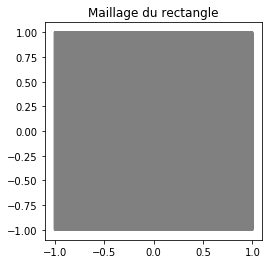

In [5]:
nx2=300
ny2=300

mesh2 = RectangleMesh(Point(-1, -1), Point(1, 1), nx2, ny2, diagonal="left") 

plt.figure(1)
plot(mesh2, title="Maillage du rectangle")
plt.show()

<h4>Définition de l'espace Hh dans lequel on va chercher les solutions</h4>

In [6]:
Hh2 = FunctionSpace(mesh2, 'P', 2) # Construction du maillage d'ordre P2

Calling FFC just-in-time (JIT) compiler, this may take some time.


<h4>Prise en compte des conditions au bord</h4>

In [9]:
#class SquareBorder(SubDomain):
def  boundary(x, on_boundary):
    return  on_boundary 
bc = DirichletBC(Hh2, Constant(1.0), boundary)


<h4>Codage de la formulation variationnelle</h4>

In [19]:
u = TrialFunction(Hh2)
v = TestFunction(Hh2)

def entieraleatoire():
    return random.randint(1,100)
nx=entieraleatoire()
ny=entieraleatoire()

#nx=50;ny=0
epsilon=nx+ny+1

f=Expression("pow(x[0],2)+pow(x[1],2)-epsilon",epsilon=epsilon,degree=2)
l=Constant(0.0)*v*dx
a=(dot(grad(u),grad(v))+f*dot(u,v))*dx

 <h4>Résolution de l'approximation variationnelle (assemblage de la matrice de rigidité et résolution du système linéaire)</h4>

In [20]:

u = Function(Hh2)
solve(a == l, u, bc)


<h4>Tracé de la solution</h4>

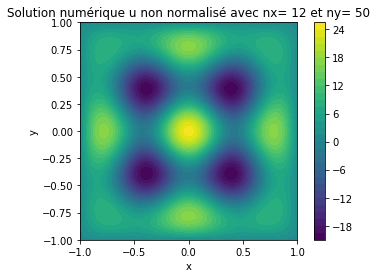

In [21]:

plu=plot(u)

plt.title('Solution numérique u non normalisé avec nx= '+str(nx) +' et ny= '+str(ny))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu)

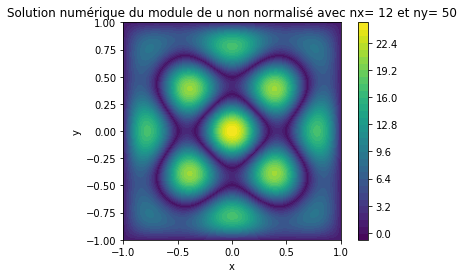

In [22]:
plu2=plot(abs(u))
plt.title('Solution numérique du module de u non normalisé avec nx= '+str(nx) +' et ny= '+str(ny))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu2)

<h3> IV- Description des simulations</h3>

Les simulations nous montrent l'expression de la densité de probabilité non normalisé. Les valeurs de $n_{x}$ et de $n_{y}$ varient de façon aléatoire. On voit apparaître des minima et des maxima.
Lorsque les deux entiers valent $0$, l'énergie vaut $\hbar\omega$ et on a un seul maxima qui est au centre.La probabilité que la particule reste au point $(0,0)$ est proche de 1 car la particule a son énergie fondamentale(énergie minimale). Il s'agit d'un résultat classique d'une particule dans un puit de potentiel. Au fur et à mesure que nx et ny augmentent on voit apparaître de nouveaux maxima et de nouveaux minima.Le passage de $n_{x}$ à $n_{x}+1$ rajoute $n_{y}+1$ combinaisons de minima et maxima et vis versa. En ces maxima et minima la probabilité de présence de la particule est plus forte qu'en d'autres points. Les minima sont moins visibles sur la simulation que les maxima.

### V- Conclusion sur l'utilité du caractère aléatoire

Le caractère aléatoire de cette simulation est modélisé par les entiers $n_{x}$ et $n_{y}$. Il s'agit des nombres quantiques dont les valeurs permettent de connaître la valeur de l'énergie de la particule. Ces entiers aléatoires sont indispensable pour illustrer le caractère quantique de la particule étudiée. En effet, au cours des expériences lorsqu'on mesure l'énergie d'une particulke il ne s'agit que d'une valeur propre $E_{n}$ de son énergie. L'abscence de ce caractère aléatoire serait donc la source d'un certain déterminisme de l'énergie de la particule et par conséquent de sa probabilité de présence en un point donné. Sans ce caratère alétoire on ne peut plus observer les phénomènes quantiques. La quantification de l'énergie est fondamentale en physique quantique. 

### VI- Bibliographie

https://fenicsproject.org/qa/3215/solving-2d-schrodinger-equation/ <br>
https://en.wikiversity.org/wiki/User:Tclamb/FEniCS#Quantum_Harmonic_Oscillator <br>
https://www.researchgate.net/publication/334680969_Quantum_Simulation_of_Discretized_Harmonic_Oscillator_on_IBM_Quantum_Computer<br>
https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/2DQuantumHarmonicOscillator/2d_oscillator2.html<br>
https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/poisson/python/documentation.html